# Projeto 2 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

**Obs**: este é o segundo notebook do projeto, e se propõe a explicar e aplicar o classificador Decision Tree.

# Carregando Dados

In [17]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [18]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

### Tradução do dataset para português

Nas próximas duas células, foi feita uma adaptação do dataset para a língua portuguesa, de modo a permitir uma melhor interpretação dos dados.

In [20]:
dataset = dataset.rename(columns = 
                     {'class': 'classe',
                      'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

In [21]:
dataset['classe']=dataset['classe'].astype('category')
dataset['classe'].cat.categories = ['comestível', 'venenoso']

dataset['formato-chapéu']=dataset['formato-chapéu'].astype('category')
dataset['formato-chapéu'].cat.categories = ['sino', 'cone', 'reto', 'nodoso', 'afundado', 'convexo']

dataset['superfície-chapéu']=dataset['superfície-chapéu'].astype('category')
dataset['superfície-chapéu'].cat.categories = ['fibroso', 'ranhuras', 'liso', 'escamoso']
 
dataset['cor-chapéu']=dataset['cor-chapéu'].astype('category')
dataset['cor-chapéu'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'rosa', 'verde', 'roxo', 'branco', 'amarelo']

dataset['hematomas']=dataset['hematomas'].astype('category')
dataset['hematomas'].cat.categories = ['não tem' , 'tem']

dataset['odor']=dataset['odor'].astype('category')
dataset['odor'].cat.categories = ['amêndoa', 'creosote', 'podre', 'anis', 'mofado', 'nenhum', 'pungente', 'picante', 'peixe']

dataset['ligação-lamela']=dataset['ligação-lamela'].astype('category')
dataset['ligação-lamela'].cat.categories = ['conectada', 'solta']

dataset['espaçamento-lamela']=dataset['espaçamento-lamela'].astype('category')
dataset['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

dataset['tamanho-lamela']=dataset['tamanho-lamela'].astype('category')
dataset['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

dataset['cor-lamela']=dataset['cor-lamela'].astype('category')
dataset['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

dataset['formato-estipe']=dataset['formato-estipe'].astype('category')
dataset['formato-estipe'].cat.categories = ['alargando', 'afunilando']
    
dataset['raiz-estipe']=dataset['raiz-estipe'].astype('category')
dataset['raiz-estipe'].cat.categories = ['não tem', 'bulboso', 'clava', 'reto', 'enraizado']

dataset['superfície-estipe-sobre-anel']=dataset['superfície-estipe-sobre-anel'].astype('category')
dataset['superfície-estipe-sobre-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['superfície-estipe-sob-anel']=dataset['superfície-estipe-sob-anel'].astype('category')
dataset['superfície-estipe-sob-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['cor-estipe-sobre-anel']=dataset['cor-estipe-sobre-anel'].astype('category')
dataset['cor-estipe-sobre-anel'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['cor-estipe-sob-anel']=dataset['cor-estipe-sob-anel'].astype('category')
dataset['cor-estipe-sob-anel']. cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['tipo-volva']=dataset['tipo-volva'].astype('category')
dataset['tipo-volva'].cat.categories = ['parcial']

dataset['cor-volva']=dataset['cor-volva'].astype('category')
dataset['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

dataset['quantidade-anéis']=dataset['quantidade-anéis'].astype('category')
dataset['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

dataset['tipo-anel']=dataset['tipo-anel'].astype('category')
dataset['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

dataset['cor-impressão-esporo']=dataset['cor-impressão-esporo'].astype('category')
dataset['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']

dataset['população']=dataset['população'].astype('category')
dataset['população'].cat.categories=['abundante', 'aglomerado', 'numeroso', 'espalhado', 'diverso', 'solitário']

dataset['habitat']=dataset['habitat'].astype('category')
dataset['habitat'].cat.categories=['madeira', 'gramínea', 'folha', 'pradaria', 'trilha', 'urbano', 'lixo']

Para poder aferir a performance do classificador, é necessário separar a base de dados em duas: treinamento e teste. Essa separação foi feita numa proporção de 3:1, ou seja, 25% Teste e 75% Treinamento.

Obs.: o atributo random_state deve ser igualado a 1 para impedir que, a cada vez que o código é rodado, seja feita uma divisão entre Treinamento e Teste diferente. Isso garante que o classificador também seja sempre o mesmo.

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

# Classificador Decision Tree


Esta seção é destinada à aplicação do modelo de classificação Decision Tree. Esse modelo utiliza a base treinamento (separada a partir do dataset) para prever a classe de um dado cogumelo.

**Motivação**: a Decision Tree foi escolhida como a primeira técnica de classificação dos cogumelos porque ela permite uma simples visualização do processo.

### Funcionamento do Classificador

As decisions trees são um tipo de modelagem preditiva, usadas em estatística, que fazem o uso da mineração de dados e aprendizado de máquina. São utilizadas como uma ferramenta de suporte de decisão visual e analítica, como meio descritivo para calcular probabilidades condicionais, e quando não se tem um conhecimento completo sobre um assunto.

Seu funcionamento se baseia em uma série de perguntas formuladas a partir de features. Assim, cada registro (nesse projeto: cogumelo) responde de forma binária a cada questão e segue um rumo próprio na árvore, chegando a um resultado de classificação, muito parecido com um fluxograma. 

A anatomia do classificador é uma árvore binária, cujos ramos possuem apenas duas respostas possíveis. O processo começa na raiz, que é a primeira pergunta (circulado em verde na imagem). A partir da resposta à raiz, o fluxo pode seguir para dois lados: esquerda (SIM) e direita (NÃO). E assim por diante, o "cogumelo" vai seguindo o caminho e se deparando com mais perguntas (chamadas de nós) que o direcionarão a um final. O lado em que o "cogumelo cair" determina sua classificação.
   
<img src=img/decision.png width=40%>
   
Para definir qual será a primeira pergunta (raiz) de decision tree, é utilizado o cálculo das Impurezas de Gini. Neste cálculo, o menor valor obtido será o escolhido. Este processo se repete para que gradativamente sejam escolhidas as próximas perguntas, a partir da raiz. No caso dos cogumelos, o menor valor de Impureza de Gini foi o de “Odor nenhum”, e portanto, foi escolhido como a primeira pergunta de nossa Decision Tree.

**Vantagens**: 
   - É fácil de entender e interpretar;
   - Pode ser utilizada mesmo com poucos dados concretos;
   - Diante de diferentes cenários, consegue prever os melhores e os piores valores;
   - Pode ser combinada com outras técnicas de decisão.
  
**Desvantagens**:
   - São instáveis, ou seja, pequenas alterações na base de dados podem afetar fortemente os resultados;
   - São consideravelmente imprecisas, se compararmos com outros modelos como: 'Random Forest';
   - O ganho de informações em cada nível pode ser tendencioso;
   - Os cálculos podem ser muito complexos.

### Aplicação do Classificador

Nesta seção, será devidamente aplicado o classificador Decision Tree. Ao longo da aplicação, serão explicadas as razões por trás de cada código, bem como o funcionamento da biblioteca sklearn.tree, utilizada para fazer o modelo.

### Preparando os dados de treinamento:

Antes de aplicar o classificador, é preciso ajeitar os dados de modo que eles estejam prontos para o classificador. O método Decision Tree da biblioteca do SciKit Learn utiliza variáveis binárias. Como as features do dataset dos cogumelos não está em formato binário, precisamos fazer essa transformação. Na linguagem do Pandas, essa transformação é chamada de dummy.

O classificador será construído com base nos dados de treinamento, os quais já foram devidamente separados em um dataset 
único neste notebook. Portanto, resta transfomá-los em dummies.

Além disso, o método Decision Tree do SciKit Learn também recebe dois principais argumentos: um dataframe com as features (aqui chamados de X), e outro com o target (aqui chamados de Y).

As duas células a seguir fazem esse processo de transformar as variáveis features em dummies.

In [23]:
colunas_feature = list(train.columns)
colunas_feature.remove('classe')  # removendo a target para ficar somente com as features

In [24]:
X = train.loc[:, colunas_feature]
X = pd.get_dummies(X)
X.head(3)

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
6253,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2739,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7436,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Nota-se que, no dataset acima, as 22 features foram convertidas em 117. Para explicar isso, vai um exemplo: antes de transformar as variáveis em dummies, tinha-se que a cor do chapéu do cogumelo poderia ser branca, rosa, vermelha, marrom, etc. Como as respostas para o modelo de árvore de decisão são binárias, não faria sentido se um nó da árvore perguntasse "qual a cor do chapéu do cogumelo?", porque seriam várias respostas. Logo, a pergunta certa a se fazer seria a seguinte: a cor do chapéu do cogumelo é branca? Para essa pergunta, há somente duas respostas: sim ou não. Assim, o processo de transformar as variáveis em dummies resulta em características binárias (sim ou não / tem ou não tem), que podem ser utilizadas pelo Decision Tree.

A célula a seguir transforma a coluna "classe" em valores binários. "Venenoso" foi substituído por 1, e "comestível", por 0.

In [25]:
train.loc[train['classe']=='venenoso', 'y'] = 1
train.loc[train['classe']=='comestível', 'y'] = 0
y=train.loc[:, 'y']
y.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


6253    1.0
2739    0.0
7436    1.0
Name: y, dtype: float64

### Criando o modelo:

Com os dados devidamente preparados, é possível aplicar o classificador Decision Tree. Para isso, basta importar as bibliotecas do SciKit Learn necessárias e aplicar o código "fit" nas variáveis X (features) e y (target) preparadas no item anterior. 

Vale ressaltar que, para o atributo "random_state" do código abaixo, foi dado o valor 1 de modo a fazer com que o classificador utilize sempre a mesma árvore de decisão.

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(random_state=1)

### Visualização da Árvore

Pode-se plotar a árvore de decisão construída pelo SciKit Learn. Nela, cada nó representa uma pergunta. Por exemplo: na raiz (primeiro nó), pergunta-se se o cogumelo não possui odor. Se a resposta for sim (cogumelo não possui odor), o "cogumelo vai para a esquerda", caso contrário, para a direita.

Obs.: para dar um zoom na árvore de decisão, basta dar dois cliques nela. 

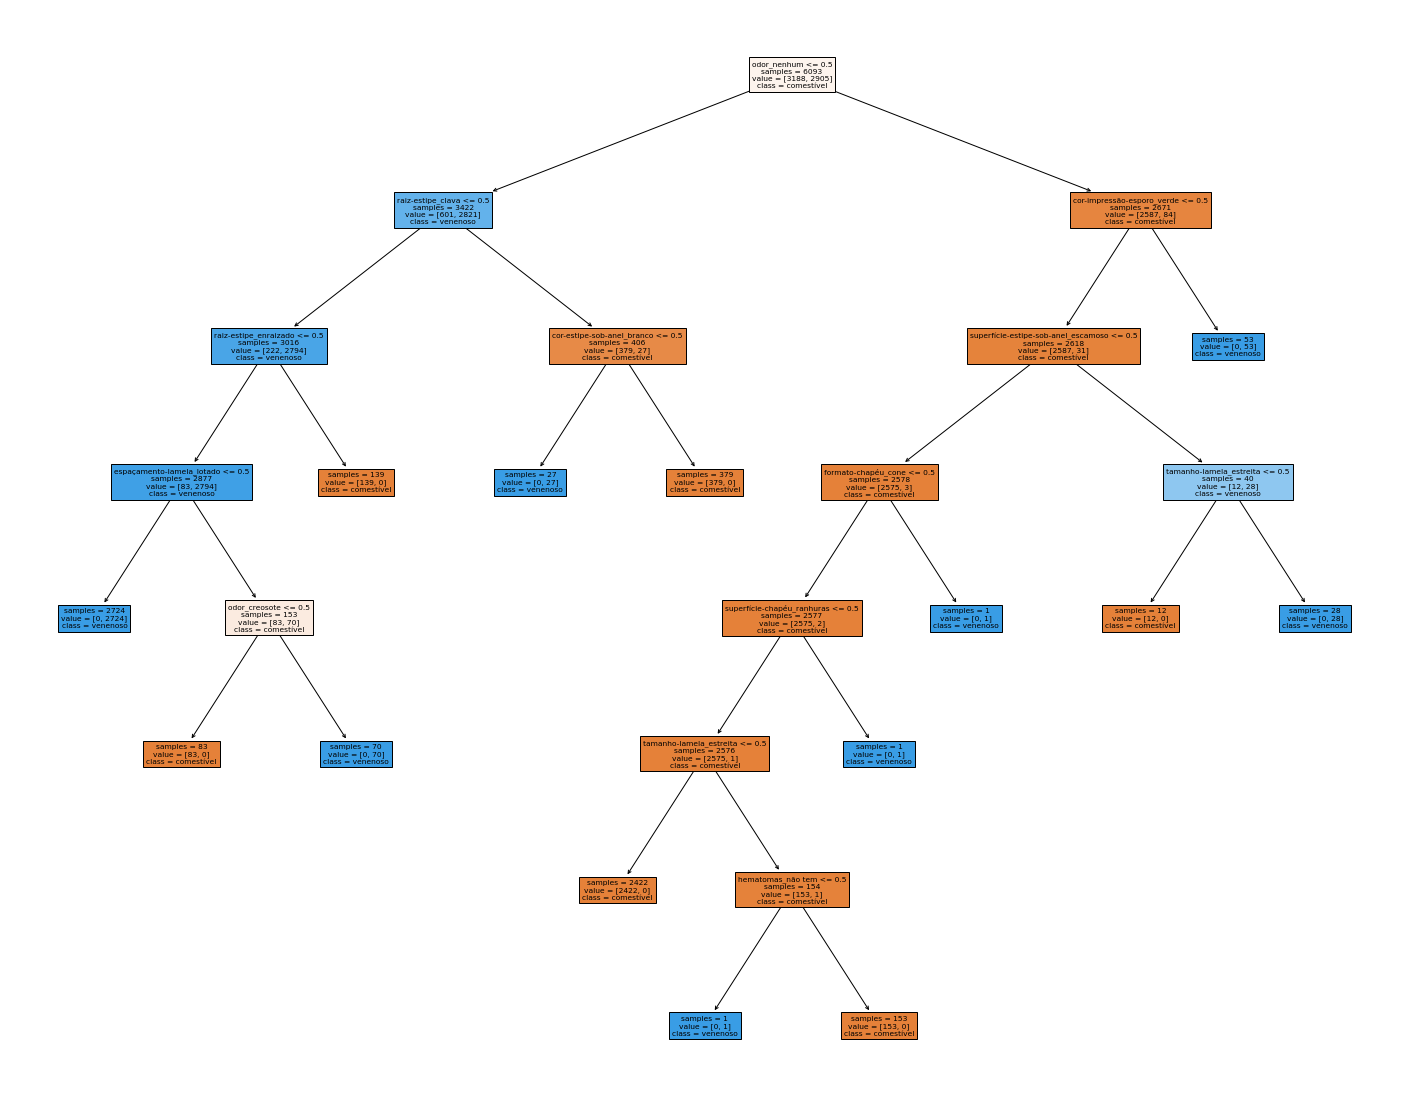

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, impurity=False, filled = True, feature_names=X.columns, class_names=['comestível', 'venenoso'])

## Testando a performance do modelo:

Não basta apenas o classificador funcionando, é preciso avaliar sua acurácia. Para isso, existem diversos métodos, dos quais alguns serão utilizados nesta seção.

#### Teste de Underfitting

O primeiro teste que pode ser feito é o do underfitting. Underfitting é quando o modelo não se aplica bem aos próprios dados de treinamento. Para avaliar isso, basta aplicar o código "score" aos próprios dados X e Y definidos antes:

In [28]:
score_treinamento=clf.score(X, y)
print('O score do classificador quando aplicado à própria base de treinamento é de {}%. Logo, não há underfitting.'.format(score_treinamento*100))

O score do classificador quando aplicado à própria base de treinamento é de 100.0%. Logo, não há underfitting.


#### Teste de Overfitting

Overfitting é quando o modelo se aplica bem ao treinamento, mas não apresenta um bom score quando aplicado a uma base de teste.
Para isso, será preciso preparar a base de testes da mesma forma que a base de treinamento, ou seja: transformar variáveis em dummies e separarar a base em X e Y.

In [29]:
X_test = test.loc[:, colunas_feature]
X_test = pd.get_dummies(X_test)
X_test.head(3)

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
1392,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3725,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [30]:
test.loc[test['classe']=='venenoso', 'y_test']=1
test.loc[test['classe']=='comestível', 'y_test']=0
y_test=test.loc[:, 'y_test']
y_test.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


1392    0.0
4051    1.0
3725    1.0
Name: y_test, dtype: float64

Na célula abaixo, obtém-se o score do modelo quando aplicado à base de testes:

In [31]:
score_teste=clf.score(X_test, y_test)
print('O score do classificador quando aplicado à base de teste é de {}%. Logo, não há overfitting.'.format(score_teste*100))

O score do classificador quando aplicado à base de teste é de 100.0%. Logo, não há overfitting.


#### Validação Cruzada

Outra forma de testar a performance do classificador é a validação cruzada. Esse processo se baseia em dividir diversas vezes o dataset em treinamento e teste, construir o modelo com a base de treinamento e testar o score com a base de teste. Para isso, novamente é necessário transformar as features em dummies, mas agora é com o dataset inteiro.

In [32]:
from sklearn.model_selection import cross_val_score  # função do SciKit Learn que faz a validação cruzada

X_cross = dataset.loc[:, colunas_feature]
X_cross = pd.get_dummies(X_cross)

dataset.loc[dataset['classe']=='venenoso', 'y_cross'] = 1
dataset.loc[dataset['classe']=='comestível', 'y_cross'] = 0
y_cross=dataset.loc[:, 'y_cross']

clf.fit(X_cross, y_cross)

score_medio=cross_val_score(clf, X_cross, y_cross, cv=10).mean()  # rodando a validação cruzada 10 vezes (cv=10) e obtendo a média
print('O score médio da validação cruzada é {}%. Pode-se afirmar que a performance do classificador é alta.'.format((score_medio*100).round(2)))

O score médio da validação cruzada é 96.83%. Pode-se afirmar que a performance do classificador é alta.


## Features mais Relevantes

Outra informação interessante que pode ser obtida por meio da biblioteca SciKit Learn são as importâncias de cada feature para o processo de classificação. A unidade de medida dessa importância é em porcentagem, indicando que se trata de um comparação entre features.

O código abaixo serve para definir as features cuja importância é pelo menos 1.5 %.

In [37]:
importancias = clf.feature_importances_
mais_imp = []
imps=[]
i=0
for imp in importancias:
    if imp>=0.02:
        mais_imp.append(X.columns[i])
        imps.append(imp)
    i+=1

Uma maneira legal de visualizar a importância das features é um gráfico de barras. Para isso, utilizou-se a biblioteca Seaborn.

No handles with labels found to put in legend.


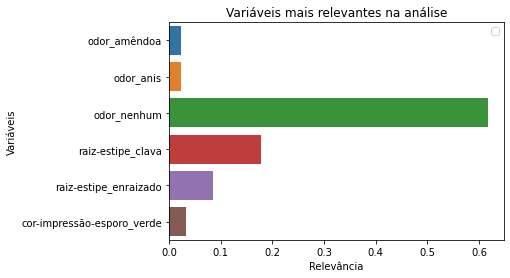

In [38]:
import seaborn as sns

sns.barplot(x=imps, y=mais_imp)

plt.xlabel('Relevância')
plt.ylabel('Variáveis')
plt.title("Variáveis mais relevantes na análise")
plt.legend()
plt.show()

O gráfico acima mostra que a feature "odor_nenhum" é bastante relevante para a classificação. Talvez seja por isso que a raiz da árvore apresenta uma pergunta comessa feature.

## Comentários Finais

Pode-se concluir que o modelo Decision Tree é bastante eficiente para classificar cogumelos. No entanto, isso não siginifica que o problema está resolvido, o projeto está pronto e funcionando perfeitamente. Como foi explicado anteriormente, o modelo de Decision Trees possui certas desvantagens, e por isso não se pode concluir que ele é um classificador perfeito somente porque seu score é alto.

De modo a evitar falsas conclusões e aperfeiçoar a análise, será testado outro classificador: Random Forests. O notebook 3 contém a explicação e aplicação desse método.

# Referências 


- https://mljar.com/blog/visualize-decision-tree/ : Utilizado para explicar a teoria de Decision Tree
- https://en.wikipedia.org/wiki/Decision_tree : Utilizado para complementar a teoria, explicas as utilizações, e também vantagens e desvantagens do modelo
- https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05 : Utilizado para complementar a explicação, e também onde foi retirada a imagem.
- https://www.youtube.com/watch?v=7VeUPuFGJHk&t=4s&ab_channel=StatQuestwithJoshStarmer : explicação sobre impureza de Gini.
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html : biblioteca do SciKit Learn para o classificador Decision Tree.